In [1]:
import numpy as np
import json

# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# シグモイド関数の微分
def sigmoid_derivative(x):
    return x * (1 - x)

# ニューロン情報付きモデルの保存関数
def save_model_text(file_name, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    model_data = {
        "hidden_layer": {
            f"neuron_{i}": {
                "weights": weights_input_hidden[:, i].tolist(),
                "bias": bias_hidden[0][i]
            }
            for i in range(weights_input_hidden.shape[1])
        },
        "output_layer": {
            f"neuron_{i}": {
                "weights": weights_hidden_output[:, i].tolist(),
                "bias": bias_output[0][i]
            }
            for i in range(weights_hidden_output.shape[1])
        }
    }
    with open(file_name, "w") as f:
        json.dump(model_data, f, indent=4)
    print(f"Model with neuron details saved to {file_name}")

# モデルの読み込み関数
def load_model_text(file_name):
    with open(file_name, "r") as f:
        model_data = json.load(f)
    print(f"Model loaded from {file_name}")
    hidden_layer_weights = np.array([neuron["weights"] for neuron in model_data["hidden_layer"].values()]).T
    hidden_layer_bias = np.array([[neuron["bias"] for neuron in model_data["hidden_layer"].values()]])
    output_layer_weights = np.array([neuron["weights"] for neuron in model_data["output_layer"].values()]).T
    output_layer_bias = np.array([[neuron["bias"] for neuron in model_data["output_layer"].values()]])
    return hidden_layer_weights, output_layer_weights, hidden_layer_bias, output_layer_bias

# ファイルからトレーニングデータを読み込む関数
def load_training_data(file_name, label):
    data = []
    with open(file_name, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                # 行をリストに変換
                pattern = eval(line)
                data.append((pattern, label))
    return data

# トレーニングデータの準備
def prepare_training_data(data_0_file, data_1_file):
    data_0 = load_training_data(data_0_file, 0)
    data_1 = load_training_data(data_1_file, 1)
    all_data = data_0 + data_1
    np.random.shuffle(all_data)  # データをランダムにシャッフル
    inputs = np.array([item[0] for item in all_data])
    outputs = np.array([[item[1]] for item in all_data])
    return inputs, outputs

# ニューラルネットワークのトレーニング関数
def train_neural_network(training_inputs, training_outputs, input_size, hidden_size, output_size, learning_rate, epochs, model_file):
    # 重みとバイアスの初期化
    np.random.seed(42)
    weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
    bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
    bias_output = np.random.uniform(-1, 1, (1, output_size))

    # トレーニングループ
    for epoch in range(epochs):
        # フォワードパス
        hidden_layer_input = np.dot(training_inputs, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        # 誤差計算
        error = training_outputs - predicted_output

        # バックプロパゲーション
        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        # 重みとバイアスの更新
        weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        weights_input_hidden += training_inputs.T.dot(d_hidden_layer) * learning_rate
        bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
        bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

    # モデルを保存
    save_model_text(model_file, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)

# ファイル名
data_0_file = "data_0.txt"
data_1_file = "data_1.txt"
model_file = "trained_model.json"

# トレーニングデータの準備
training_inputs, training_outputs = prepare_training_data(data_0_file, data_1_file)

# ニューラルネットワークの設定
input_size = 12
hidden_size = 8
output_size = 1
learning_rate = 0.1
epochs = 10000

# トレーニングの実行
train_neural_network(training_inputs, training_outputs, input_size, hidden_size, output_size, learning_rate, epochs, model_file)


Epoch 0, Error: 0.4786798942923304
Epoch 1000, Error: 0.012605260465238771
Epoch 2000, Error: 0.008336595007902814
Epoch 3000, Error: 0.006571055761071706
Epoch 4000, Error: 0.005560155387058669
Epoch 5000, Error: 0.0048895039951581155
Epoch 6000, Error: 0.004404990660234828
Epoch 7000, Error: 0.0040348586800980565
Epoch 8000, Error: 0.003740728364233166
Epoch 9000, Error: 0.0035000254215633688
Model with neuron details saved to trained_model.json


Model loaded from trained_model.json


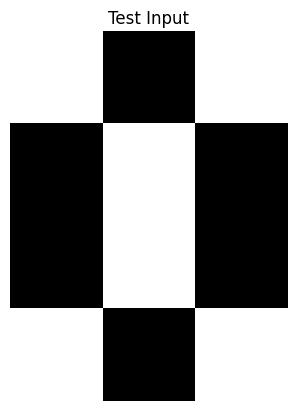

Predicted Output: [[0.00240578]]


In [5]:
import numpy as np
import json
import matplotlib.pyplot as plt

# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# モデルの読み込み関数
def load_model_text(file_name):
    with open(file_name, "r") as f:
        model_data = json.load(f)
    print(f"Model loaded from {file_name}")
    hidden_layer_weights = np.array([neuron["weights"] for neuron in model_data["hidden_layer"].values()]).T
    hidden_layer_bias = np.array([[neuron["bias"] for neuron in model_data["hidden_layer"].values()]])
    output_layer_weights = np.array([neuron["weights"] for neuron in model_data["output_layer"].values()]).T
    output_layer_bias = np.array([[neuron["bias"] for neuron in model_data["output_layer"].values()]])
    return hidden_layer_weights, output_layer_weights, hidden_layer_bias, output_layer_bias

# パターン表示関数
def display_pattern(pattern, title=""):
    pattern_reshaped = np.array(pattern).reshape(4, 3)
    plt.imshow(pattern_reshaped, cmap="Greys", interpolation="nearest")
    plt.title(title)
    plt.axis("off")
    plt.show()

# 画像データ
pattern_0 = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
# pattern_0 = [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
# 保存モデルの読み込み
weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = load_model_text("trained_model.json")

# テスト入力
test_input = pattern_0

# フォワードパス
hidden_layer_input = np.dot(test_input, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

# 結果表示
display_pattern(test_input, title="Test Input")
print("Predicted Output:", predicted_output)